Found 3944 files belonging to 10 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


2024-09-30 14:04:21.795735: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


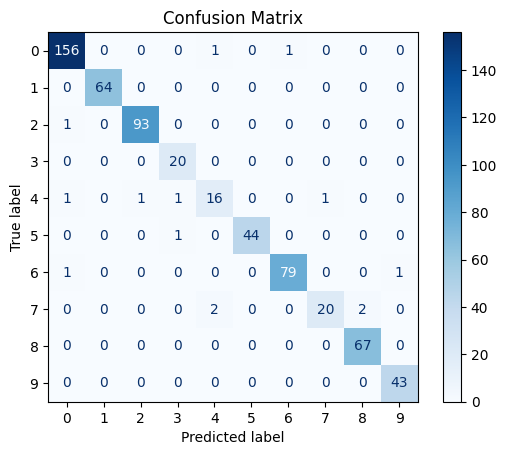

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
import tensorflow as tf

# Load the model
model = load_model('models/palm_tree_health_model.h5')
# Prepare dataset with shuffle enabled
data = tf.keras.utils.image_dataset_from_directory(
    './palm_diseases_data/', 
    image_size=(256, 256),
    color_mode='rgb', 
    batch_size=32, 
    shuffle=True  # Shuffle data
)


# Split sizes
train_size = 0.7  # 70% training data
val_size = 0.15   # 15% validation data
test_size = 0.15  # 15% test data

# Calculate the number of batches in the dataset
total_batches = tf.data.experimental.cardinality(data).numpy()

train_batches = int(total_batches * train_size)
val_batches = int(total_batches * val_size)
test_batches = int(total_batches * test_size)

# Split the dataset using the calculated sizes
train = data.take(train_batches)
val_test = data.skip(train_batches)
val = val_test.take(val_batches)
test = val_test.skip(val_batches)

# Optionally, prefetch the data for better performance
train = train.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val = val.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test = test.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


# Replace 'test' with your actual test dataset iterator
y_true = []
y_pred = []

# Example loop over test dataset, adjust as necessary
for images, labels in test:  # Replace 'test' with your test dataset
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()


In [5]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred are already collected from the test set
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       158
           1       1.00      1.00      1.00        64
           2       0.99      0.99      0.99        94
           3       0.91      1.00      0.95        20
           4       0.84      0.80      0.82        20
           5       1.00      0.98      0.99        45
           6       0.99      0.98      0.98        81
           7       0.95      0.83      0.89        24
           8       0.97      1.00      0.99        67
           9       0.98      1.00      0.99        43

    accuracy                           0.98       616
   macro avg       0.96      0.96      0.96       616
weighted avg       0.98      0.98      0.98       616

